In [ ]:
!pip install sigpytch

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from sigpytch.forecasters import LSTMForecaster

<Axes: xlabel='Date'>

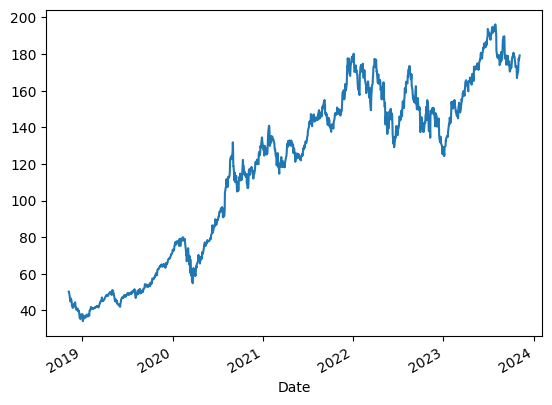

In [ ]:
ticker = yf.Ticker('AAPL')
close = ticker.history(period='5y')['Close']
close.plot()

In [ ]:
lstm = LSTMForecaster(series=close)

In [ ]:
lstm.forecast_len = 252

In [ ]:
df_train = lstm.train(lags=252, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 252)               256032    
                                                                 
 dense (Dense)               (None, 252)               63756     
                                                                 
Total params: 319788 (1.22 MB)
Trainable params: 319788 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 10s 357ms/step - loss: 0.0790
Epoch 2/10
24/24 [==============================] - 9s 358ms/step - loss: 0.0339
Epoch 3/10
24/24 [==============================] - 8s 334ms/step - loss: 0.0283
Epoch 4/10
24/24 [==============================] - 9s 372ms/step - loss: 0.0286
Epoch 5/10
24/24 [==============================] - 9s 365ms/step - loss: 0.0265
Epoch 6/10

In [ ]:
df_train

,Close,Prediction
Date,,
2018-11-07 00:00:00-05:00,50.269054,NaN
2018-11-08 00:00:00-05:00,50.093655,NaN
2018-11-09 00:00:00-05:00,49.127777,NaN
2018-11-12 00:00:00-05:00,46.652996,NaN
2018-11-13 00:00:00-05:00,46.186886,NaN
...,...,...
2023-10-31 00:00:00-04:00,170.770004,163.723022
2023-11-01 00:00:00-04:00,173.970001,163.788513
2023-11-02 00:00:00-04:00,177.570007,163.764343


<Axes: xlabel='Date'>

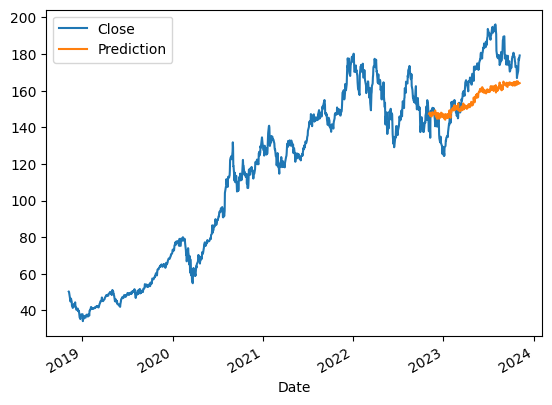

In [ ]:
df_train.plot()

In [ ]:
df_fcst = lstm.forecast()

1/1 [==============================] - 0s 68ms/step


In [ ]:
df_fcst

,Close,Forecast
2018-11-07 00:00:00-05:00,50.269054,NaN
2018-11-08 00:00:00-05:00,50.093655,NaN
2018-11-09 00:00:00-05:00,49.127777,NaN
2018-11-12 00:00:00-05:00,46.652996,NaN
2018-11-13 00:00:00-05:00,46.186886,NaN
...,...,...
2024-10-17 00:00:00-04:00,NaN,159.276413
2024-10-18 00:00:00-04:00,NaN,158.990311
2024-10-21 00:00:00-04:00,NaN,159.539719
2024-10-22 00:00:00-04:00,NaN,160.051147


<Axes: >

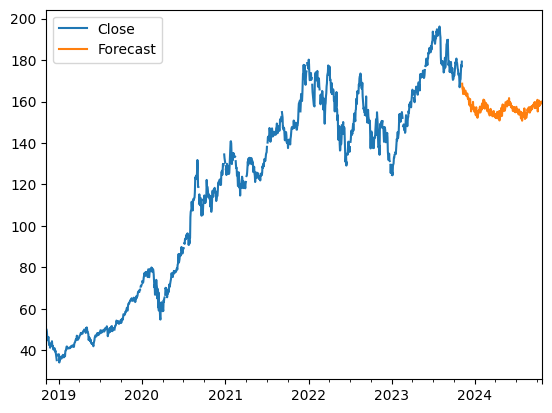

In [ ]:
df_fcst.plot()